In [1]:
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
import tensorflow as tf

/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/rishotics/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dance_image=[]
labels=[]
for dance_dir_path in glob.glob("/home/rishotics/ppd_sir/Training/*"):
    dance_label=dance_dir_path.split("/")[-1]
    for dance_path in glob.glob(os.path.join(dance_dir_path,"*.jpg")):
        image=cv.imread(dance_path,-1)
        image = cv.resize(image, (720, 1280))
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        labels.append(dance_label)
        dance_image.append(image)
dance_image=np.array(dance_image)
labels=np.array(labels)
dance_to_dict={i:k for k,i in enumerate(np.unique(labels))}
dict_to_id={i:k for k,i in dance_to_dict.items()}
label_id=np.array([dance_to_dict[x] for x in labels])
        
   

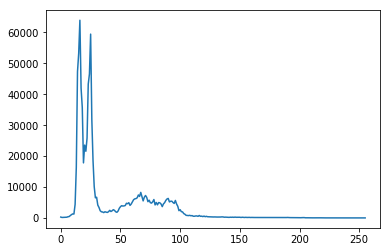

In [21]:
hist=cv.calcHist([dance_image[3]],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

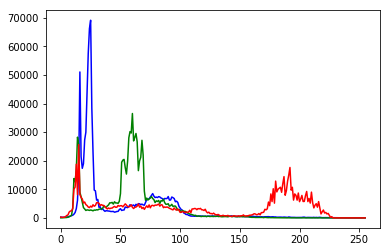

In [22]:

color=('b','g','r')

for i,col in enumerate(color):
    hist=cv.calcHist([dance_image[20]],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    
plt.show()

In [5]:
def hsgm(img):
    color=('b','r','g')
    
    for i,col in enumerate(color):
        hist=cv.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist,color=col)
    
    plt.show()

In [3]:
img=dance_image[1]
img2=img
hsgm(dance_image[1])
blur=cv.GaussianBlur(dance_image[1],(5,5),0)
blur=cv.medianBlur(dance_image[1],5)

gs=cv.cvtColor(blur,cv.COLOR_BGR2GRAY)
so=cv.Sobel(gs,ddepth=-1,dx=0,dy=1)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(so),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

edges=cv.Canny(gs,50,100,apertureSize=3)
plt.imshow(edges)
lines = cv.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(img2,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img2)
cv.imwrite('hough.jpg',dance_image[1])



NameError: name 'hsgm' is not defined

True

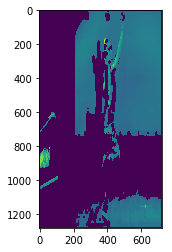

In [7]:
gs=cv.cvtColor(blur,cv.COLOR_BGR2GRAY)

edges=cv.Canny(gs,50,100,apertureSize=3)
lines = cv.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(img2,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(edges)
plt.imshow(gs)
ret,th=cv.threshold(gs,80,255,cv.THRESH_TOZERO)
img, contours, hierarchy = cv.findContours(th,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
cnt=contours[0]
M=cv.moments(cnt)
c=cv.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(c)
cv.imwrite('contors.jpg',c)

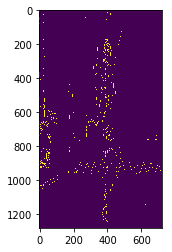

In [3]:
img=dance_image[1]
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray,(5,5),0)
ret,thresh = cv.threshold(img,120,255,cv.THRESH_TRUNC)
edges=cv.Canny(blur,50,100,apertureSize=3)
plt.imshow(edges)

FROM SKIMAGE IMPORT 



In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def nothing(x):
    pass
cv2.namedWindow('Colorbars')
hh='Max'
hl='Min'
wnd = 'Colorbars'
cv2.createTrackbar("Max", "Colorbars",0,255,nothing)
cv2.createTrackbar("Min", "Colorbars",0,255,nothing)
img = cv2.resize(gray, (0,0), fx=0.5, fy=0.5)
# titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
# images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
# for i in xrange(6):
#     plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()
while(1):
    hul=cv2.getTrackbarPos("Max", "Colorbars")
    huh=cv2.getTrackbarPos("Min", "Colorbars")
    ret,thresh1 = cv2.threshold(img,hul,huh,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(img,hul,huh,cv2.THRESH_BINARY_INV)
    ret,thresh3 = cv2.threshold(img,hul,huh,cv2.THRESH_TRUNC)
    ret,thresh4 = cv2.threshold(img,hul,huh,cv2.THRESH_TOZERO)
    ret,thresh5 = cv2.threshold(img,hul,huh,cv2.THRESH_TOZERO_INV)
    # cv2.imshow(wnd)
    cv2.imshow("thresh1",thresh1)
    cv2.imshow("thresh2",thresh2)
    cv2.imshow("thresh3",thresh3)
    cv2.imshow("thresh4",thresh4)
    cv2.imshow("thresh5",thresh5)
    
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
      mode = not mode
    elif k == 27:
      break
cv2.destroyAllWindows()

In [17]:

def nothing(x):
    pass

cv.namedWindow('Colorbars')
hh='Max'
hl='Min'
wnd = 'Colorbars'
cv.createTrackbar("Max", "Colorbars",0,255,nothing)
cv.createTrackbar("Min", "Colorbars",0,255,nothing)
img = cv.resize(img, (0,0), fx=0.5, fy=0.5)
# titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
# images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
# for i in xrange(6):
#     plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()

while(1):
    hul=cv.getTrackbarPos("Max", "Colorbars")
    huh=cv.getTrackbarPos("Min", "Colorbars")
    ret,thresh1 = cv.threshold(thresh1,68,255,cv.THRESH_BINARY)
    edges=cv.Canny(gray,hul,huh)
    

    # cv2.imshow(wnd)
    cv.imshow("canny",edges)
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv.destroyAllWindows()

error: /tmp/binarydeb/ros-kinetic-opencv3-3.3.1/modules/imgproc/src/resize.cpp:3945: error: (-215) dsize.area() > 0 in function resize


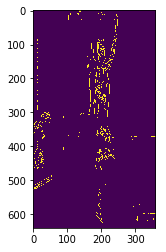

In [4]:
img = cv.resize(img, (0,0), fx=0.5, fy=0.5)
ret,thresh1 = cv.threshold(img,126,255,cv.THRESH_BINARY)
edges=cv.Canny(thresh1,0,85,apertureSize=3)
plt.imshow(edges)

In [ ]:
# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import argparse
import cv2
import cv2
shifted = cv2.pyrMeanShiftFiltering(img, 21, 51)
cv2.imshow("Input", img)
 
# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2.imshow("Thresh", thresh)
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
	labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
# loop over the unique labels returned by the Watershed
# algorithm
for label in np.unique(labels):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue
 
	# otherwise, allocate memory for the label region and draw
	# it on the mask
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
 
	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)[-2]
	c = max(cnts, key=cv2.contourArea)
 
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
 
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)

/home/rishotics/anaconda2/lib/python2.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


[INFO] 56 unique segments found
